# General Optics

In [1]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 5,
                     'axes.labelsize': 10,
                     'xtick.labelsize' : 9,
                     'ytick.labelsize' : 9,
                     'legend.fontsize' : 8,
                     'contour.linewidth' : 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (4, 3),
                     'figure.dpi': 150 }) 

## Total Internal Reflection

If we now consider the outgoing angle $\theta_2$ as a function of the incident angle $\theta_1$, we obtain a characteristic plot, which looks for the materials glass ($n=1.5$) and air ($n=1$) like below. If the incident light is coming from air and following onto glass, we can change the incident angle up to $90$ degree, but only reach an outgoing angle of $41.8$ degree. If we reverse the materials, however, an outgoing angle is reached and an angle of incidence of $41.8$ degree. Light at larger incident angles is not anymore refracted out of the glass but reflected into the glass. Therefore, this phenomenon is called **total internal reflection**. It has some fantastic applications.

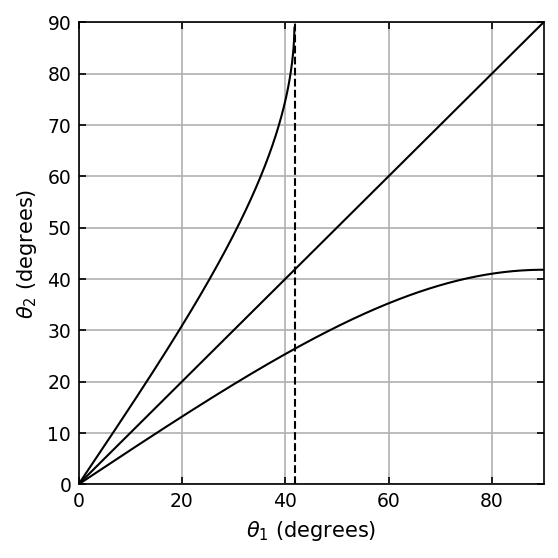

In [2]:
def snell_law(n1, n2, theta1_degrees):
    theta1_radians = np.radians(theta1_degrees)
    sin_theta2 = n1 / n2 * np.sin(theta1_radians)
    
    # Check for total internal reflection
    if sin_theta2 > 1:
        # Total internal reflection, no refraction
        return np.nan  # Use NaN to indicate no refraction occurs
    else:
        theta2_radians = np.arcsin(sin_theta2)
        return np.degrees(theta2_radians)

theta1 = np.linspace(0, 90, 1000)

n1_glass = 1.5
n2_air = 1.0

theta2_glass_to_air = np.array([snell_law(n1_glass, n2_air, angle) for angle in theta1])
plt.figure(figsize=(4, 4),dpi=150)
plt.plot(theta1, theta2_glass_to_air,"k", label='n1=1.5 to n2=1.0')
theta_c = np.degrees(np.arcsin(n2_air / n1_glass))
plt.axvline(x=theta_c, color='k', linestyle='--', label=f'Critical angle θc = {theta_c:.2f}°')

n1_glass = 1.0
n2_air = 1.5
theta2_glass_to_air = np.array([snell_law(n1_glass, n2_air, angle) for angle in theta1])

plt.plot(theta1, theta2_glass_to_air,"k", label='n1=1.5 to n2=1.0')
plt.plot(theta1, theta1,"k")

plt.xlabel(r'$θ_1$ (degrees)')
plt.ylabel(r'$θ_2$ (degrees)')

plt.xlim(0, 90)
plt.ylim(0, 90)
plt.grid(True)
plt.show()


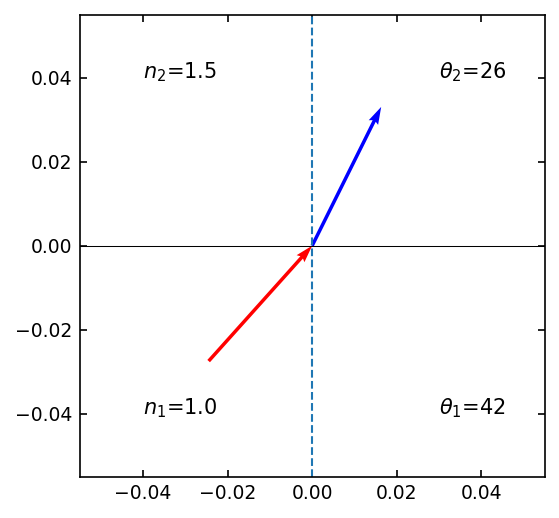

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.canvas.header_visible = False
#@widgets.interact(n1=(1,2,0.01),n2=(1,3,0.01), angle=(0, 90, 0.1))
def update(n1=1,n2=1.5,angle=45):
    """Remove old lines from plot and plot new one"""
    ax.cla()
    theta1=angle*np.pi/180
    if n1*np.sin(theta1)/n2<=1:
        theta2=np.arcsin(n1*np.sin(theta1)/n2)
    else:
        theta2=-theta1+np.pi
    #ax.set_title("Refraction Explorer")    
    ax.axvline(x=0,ls='--')
    ax.text(-0.04,0.04,r'$n_2$={}'.format(n2))
    ax.text(-0.04,-0.04,r'$n_1$={}'.format(n1))
    ax.text(0.03,0.04,r'$\theta_2$={}'.format(round(theta2*180/np.pi),1))
    ax.text(0.03,-0.04,r'$\theta_1$={}'.format(round(theta1*180/np.pi),1))


    ax.axhline(y=0,color='k',lw=0.5)
    ax.quiver(0,0,np.sin(theta1),np.cos(theta1),scale=3,pivot='tip' ,color='red')
    ax.quiver(0,0,np.sin(theta2),np.cos(theta2),scale=3,color='blue')  
    
update(n1=1.,n2=1.5,angle=41.9)

### Total internal reflection

\begin{equation}
n_1 \sin(\theta_1)=n_2\sin(\theta_2)
\end{equation}

\begin{equation}
n_2 < n_1
\end{equation}

\begin{equation}
\sin(\theta_1)=\frac{n_2}{n_1}\sin(\theta_2)
\end{equation}

$n_2/n_1 <1$

but $\theta_2$ is max. $\pi/2$

$\sin (\theta_2)$ should be larger than 1 \
$\Rightarrow$ no solution for refraction \
$\Rightarrow$ reflection for all incident angles $\theta_1>\theta_c$

\begin{equation}
\theta_c=\sin^{-1}\left|\frac{n_2}{n_1}\right|
\end{equation}

for glass: 41.8° \
for water: 48.7° \
for diamond: 24° \
in H$_2$O: 33.6°

$\Rightarrow$ measurement of refraction indices \
$\Rightarrow$ reflection without losses

#### Guiding light fibers

- cylindrical dielectric wave guide
- central core which guids light
- cladding with lower $n$ than the core

$\Rightarrow$ total internal reflection\
$\Rightarrow$ light guiding with low loss

$\Rightarrow$ typically reflected ??? waves:
- multimode (???)
- single mode
- gradient index (???)

#### Step-index fiber

\begin{equation}
\Delta=\frac{n_1-n_2}{n_1}
\end{equation}

mostly made of ??? silica $\rm{SiO}_2$\
refractive indices from $1.44$ to $1.46$ \
$\Delta=0.001$ and $0.02$

#### Meridional ray

- all in plane
- up to $\overline \theta_c=\frac{\pi}{2}-\theta_c=\cos^{-1}\left(\frac{n_2}{n_1}\right)$

#### Skewed ray

- planes ??? angle $\phi$ with core cladding ??? $\theta < \overline \theta_c$

#### Numerical aperture

calculation of the numerical aperture
\begin{equation}
1 \sin (\theta_a)=n_1 \sin \overline \theta_c = n_1 (1-\cos^2(\theta_c))^\frac 1 2
\end{equation}

\begin{equation}
\theta_c+\overline \theta_c+\frac \pi 2 = \pi
\end{equation}

\begin{equation}
\theta_c+\overline \theta_c=\frac \pi 2
\end{equation}

\begin{equation}
\theta_c=\frac \pi 2 -\overline \theta_c
\end{equation}

\begin{equation}
n_1 \sin \theta_c=n_2
\end{equation}

\begin{equation}
\sin \theta_c=\frac{n_2}{n_1}
\end{equation}

\begin{equation}
\sin \left(\frac \pi 2 - \overline \theta_c \right) =\frac{n_2}{n_1}
\end{equation}

\begin{equation}
\cos (\overline \theta_c)=\frac{n_2}{n_1}
\end{equation}

\begin{equation}
\sin (\theta_a)=n_1\left(1-\frac{n_2^2}{n_1^2}\right)^\frac 1 2 =\sqrt{n_1^2-n_2^2}=NA-n_1 (2 \Delta)^\frac 1 2
\end{equation}

## Matrix Optics

both are linear equations

\begin{equation}
\theta_2=\theta_1-\frac 4 f \qquad \theta_2\approx \frac{n_1}{n_2}\theta_1-\frac{n_2-n_1}{n_2R}y
\end{equation}

\begin{equation}
y_2=Ay_1+B\theta_1
\end{equation}

\begin{equation}
\theta_2=Cy_1+D\theta_1
\end{equation}

We want to express an optical system by a set of simple mathematical expressions, i.e., linear projections.

\begin{equation}
\left[\begin{array}{r}
y_2 \\
\theta_2
\end{array}\right]=
\left[\begin{array}{rr}
A & B \\
C & D
\end{array}\right]
\left[\begin{array}{r}
y_1 \\
\theta_1
\end{array}\right]
\end{equation}

Here,
$
\begin{bmatrix}
A & B \\
C & D
\end{bmatrix}
$
is the ray transfer matrix.

#### Free space

\begin{equation}
M=
\begin{bmatrix}
1 & d \\
0 & 1
\end{bmatrix}
\end{equation}

#### Refraction

\begin{equation}
M=
\begin{bmatrix}
1 & 0 \\
0 & \frac{n_1}{n_2}
\end{bmatrix}
\end{equation}

#### Spherical surface

\begin{equation}
M=
\begin{bmatrix}
1 & 0 \\
-\frac{n_2-n_1}{n_2R} & \frac{n_1}{n_2}
\end{bmatrix}
\end{equation}

#### Thin Lens

\begin{equation}
M=
\begin{bmatrix}
1 & 0 \\
-\frac 1 f & 1
\end{bmatrix}
\end{equation}

$f>0$ convex \
$f<0$ concave

There is a whole set of precalculated matrices for optical elements.

#### Optical systems

$M=M_NM_{N-1}\dots M_1$ (remember the two curved surfaces)

free space
\begin{equation}
M=
\begin{bmatrix}
1 & d \\
0 & 1
\end{bmatrix}
\end{equation}

thin lens
\begin{equation}
M=
\begin{bmatrix}
1 & 0 \\
-\frac 1 f & 1
\end{bmatrix}
\end{equation}

\begin{equation}
M=\begin{bmatrix}
1 & 0 \\
-\frac 1 f & 1
\end{bmatrix}
\begin{bmatrix}
1 & d \\
0 & 1
\end{bmatrix}=
\begin{bmatrix}
1 & d \\
-\frac 1 f & 1- \frac d f
\end{bmatrix}
\end{equation}

## For example: Optical cloaking

perfect cloack is an optical system which apparently immitates free space propagation

\begin{equation}
M=
\begin{bmatrix}
1 & \frac L n \\
0 & 1
\end{bmatrix}
\end{equation}

cloacking condition
\begin{equation}
\begin{bmatrix}
A & B \\
C & D
\end{bmatrix}=
\begin{bmatrix}
1 & \frac L n \\
0 & 1
\end{bmatrix}
\end{equation}

$C=0 \quad$  no ??? power, afocal

#### single lens

\begin{equation}
\begin{bmatrix}
A & B \\
C & D
\end{bmatrix}=
\begin{bmatrix}
1 & 0 \\
-\frac 1 f & 1
\end{bmatrix}
\end{equation}

not possible except for $f=\pm \infty \Rightarrow $ no cloaking

#### two lenses

\begin{equation}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_2} & 1
\end{bmatrix}
\begin{bmatrix}
1 & t \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_1} & 1
\end{bmatrix}=
\begin{bmatrix}
1-\frac{t}{f_1} & t \\
-\frac{f_1+f_2-t}{f_1f_2} & 1-\frac{t}{f_2}
\end{bmatrix}
\end{equation}

$\Rightarrow$ needs $f_1=f_2=\pm \infty$

$1-\frac{t}{f_1}=1,~ 1-\frac{t}{f_2}=1$

#### three lenses

\begin{equation}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_3} & 1
\end{bmatrix}
\begin{bmatrix}
1 & t_2 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_2} & 1
\end{bmatrix}
\begin{bmatrix}
1 & t_1 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_1} & 1
\end{bmatrix}
\end{equation}


\begin{equation}
C=0:\quad 
f_2=-\frac{(f_1-t_1)(f_3-t_2)}{f_1+f_3-t_1-t_2}
\end{equation}

$\Rightarrow$ matrix, four lens system

\begin{equation}
\begin{bmatrix}
\frac{f_3(f_1-t_1)}{f_1(f_3-t_2)} & t_1+t_2+t_1t_2\frac{f_1+f_3-t_1-t_2}{(f_1-t_1)(f_3-t_2)}\\
0 & \frac{f_1 (f_3-t_2)}{f_3 (f_1-t_1)}
\end{bmatrix}
\end{equation}

from $B=t_1+t_2$

\begin{equation}
t_1t_2\frac{f_1+f_3-t_1-t_2}{(f_1-t_1)(f_3-t_2)}=0
\end{equation}

a) this in only true if $t_1=0$ or $t_2=0$\
b) or if $f_1+f_3-t_1-t_2=0$

a) $\Rightarrow$ two lens system $\Rightarrow$ no cloaking \
b) follows that $f_2 \rightarrow \infty$ $\Rightarrow$ two lens $\Rightarrow$ no cloaking 

$\Rightarrow$ three lens, no cloaking

#### four lens system

\begin{equation}
\begin{bmatrix}
1 & t_4 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_4} & 1
\end{bmatrix}
\begin{bmatrix}
1 & t_3 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_3} & 1
\end{bmatrix}
\begin{bmatrix}
1 & t_2 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_2} & 1
\end{bmatrix}
\begin{bmatrix}
1 & t_1 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
-\frac{1}{f_1} & 1
\end{bmatrix}
\end{equation}

with conditions $f_1=f_4, f_2=f_3, t_1=t_3$ \
require that $A=1, C=0$
with $t_1=f_1+f_2$

\begin{equation}
\begin{bmatrix}
1 & f_1(-2t_1^2+f_1(2t_1+t_2))/(f_1-t_1)^2)\\
0 & 1
\end{bmatrix}
\end{equation}

$B=2t_1+t_2$
\begin{equation}
t_2=2f_2 \frac{f_1+f_2}{f_1-f_2}
\end{equation}

### Fermat's Principle

- optical inhomogeneous material $n(\vec r)$, $\vec r= \{x, y, z\}$
- optical path length
\begin{equation}
OP=\int_A^B n(\vec r) \mathrm ds
\end{equation}
- time taken to get from $A$ to $B$ is proportonal to $OP$ length

Fermat's principle: optical path length is an extremum to neighboring path

\begin{equation}
\delta \int_A^B n(\vec r)\mathrm d s=0
\end{equation}

$\Rightarrow$ minimum, maximum, point of inflection \
usually minimum

point of inflection

#### Refraction

\begin{equation}
A=\begin{pmatrix}
0 \\ z_1
\end{pmatrix}, \quad
B= \begin{pmatrix}
y_2 \\ z_2
\end{pmatrix}, \quad
R=\begin{pmatrix}
y_0 \\ 0
\end{pmatrix}
\end{equation}

\begin{equation}
OPL=n_1 \sqrt{y_0^2+z_1^2}+n_2\sqrt{(y_2-y_0)^2+z_2^2}
\end{equation}

Fermat:
\begin{equation}
\begin{split}
\frac{\mathrm d (OPL)}{\mathrm d y_0}&=n_1\frac{y_0}{\sqrt{y_0^2+z_1^2}}-n_2\frac{y_2-y_0}{\sqrt{(y_2-y_0)^2+z_2^2}}=0\\
&= n_1 \frac{y_0}{l_1}-n_2 \frac{y_2-y_0}{l_2}\\
&= n_1 \sin (\alpha) - n_2 \sin (\beta)
\end{split}
\end{equation}

This is Snell's law.

#### Thin lens

$n \dots$ refraction index of lens \
$R_1, R_2 \dots$ curvature

\begin{equation}
\begin{split}
OPL&= z_1(y)+n(d-z_1(y)-z_2(y))+z_2(y)+\sqrt{f^2+y^2}\\
&\equiv nd+f-(n-1)\left(\frac{y^2}{2 R_1}-\frac{y^2}{2R_2}\right)+\frac{y^2}{2f}
\end{split}
\end{equation}

$\Rightarrow$ all OPL must be the same if the rays converge at f

\begin{equation}
\frac{\mathrm d (OPL)}{\mathrm d y}=-(n-1)\left(\frac{y}{R_1}-\frac{y}{R_2} \right)+\frac y f =0
\end{equation}

### Formulation of Fermat's principle

integral (global)
\begin{equation}
\delta \int_A^B n(\vec{r})\,\mathrm ds=0
\end{equation}

differential (local)
\begin{equation}
\frac{\mathrm d}{\mathrm ds}\left(n\frac{\mathrm d (\vec{r})}{\mathrm ds}\right)=\nabla n
\end{equation}

if the trajectory is described by $x(s), y(s), z(s)$ ??? variational calculus.

#### Differential form in components
\begin{equation}
\frac{\mathrm d}{\mathrm ds}\left(n \frac{\mathrm dx}{\mathrm ds}\right)=\frac{\partial n}{\partial x} \qquad \frac{\mathrm d}{\mathrm ds}\left(n \frac{\mathrm dy}{\mathrm ds}\right)=\frac{\partial n}{\partial y} \qquad \frac{\mathrm d}{\mathrm ds}\left(n \frac{\mathrm dz}{\mathrm ds}\right)=\frac{\partial n}{\partial z}
\end{equation}

\begin{equation}
x(s) \hspace{3.9cm} y(s) \hspace{3.9cm} z(s)
\end{equation}

difficult to solve but possible with parametrization

\begin{equation}
x=x(z),\quad y=y(z), \quad \mathrm ds = \mathrm dz  \sqrt{1+\left(\frac{\mathrm dx}{\mathrm dz}\right)^2+\left(\frac{\mathrm dy}{\mathrm dz}\right)^2}
\end{equation}

\begin{equation}
\mathrm ds \approx \mathrm dz
\end{equation}

paraxial approximation:
\begin{equation}
\Rightarrow \frac{\mathrm d}{\mathrm dz}\left(n\frac{\mathrm dx}{\mathrm dz}\right) \approx \frac{\partial n}{\partial x} \qquad \frac{\mathrm d}{\mathrm dz}\left(n \frac{\mathrm dy}{\mathrm dz}\right)\approx \frac{\partial n}{\partial y}
\end{equation}

homogeneous medium:
\begin{equation}
n={\rm const.} \quad \Rightarrow \quad \frac{\mathrm d^2 x}{\mathrm dz^2}=\frac{\mathrm d^2 y}{\mathrm dz^2}=0 \quad {\rm straight~line}
\end{equation}

### GRIN lens

graded index lens

SELFOC
\begin{equation}
n^2(y)=n_0^2(1-\alpha^2y^2)
\end{equation}

for $\alpha^2y^2 \ll 1$: parabolic index profile
\begin{equation}
n(y)\approx n_0 \left(1-\frac 1 2 \alpha^2y^2\right)
\end{equation}

\begin{equation}
\frac{\mathrm d^2y}{\mathrm dz^2}\approx -\alpha^2y=\frac{\partial n}{\partial y}
\end{equation}

\begin{equation}
y(z)=y_0 \cos(\alpha z)+\frac{\theta_0}{\alpha}\sin(\alpha z)
\end{equation}
The refractive index square is like a potential.

#### What you should know:

- How to create a magnifying optical system?
- What are the simplifying assumptions behind the imaging equations for a thin lens?
- What are virtual images and real images?
- How to construct an image of a lens or a lens system?
- How to detect the direction from which light is coming?

### Mirage effect over a hot street

approximation
\begin{equation}
n(y)=n_0+\alpha y \quad{\rm (approximately~linear)}
\end{equation}

\begin{equation}
\frac{\mathrm d^2x}{\mathrm da^2}=0, \quad \frac{\mathrm d^2 y}{\mathrm da^2}=\frac{1}{2}\nabla n^2=\alpha(n_0+\alpha y)
\end{equation}

\begin{equation}
\Rightarrow x=Aa+B
\end{equation}

\begin{equation}
\Rightarrow y=C \cosh(\alpha a)+D \sinh(\alpha a)-\left(\frac{n_0}{a}\right)
\end{equation}

let $a=0$ at $x=0$ (like $t=0$ in mechanics)

at $x_{a=0}=0$, $y_{a=0}=h$

\begin{equation}
\Rightarrow B=0, \quad C=h+\frac{n_0}{\alpha}
\end{equation}

same now checked with $\frac{\mathrm d \vec{r}}{\mathrm da}=n$ (corresponds to velocity)
at $x=0$ horizontal

\begin{equation}
\Rightarrow \frac{\mathrm dx}{\mathrm da}=n_h=n_0+\alpha h, \quad \frac{\mathrm dy}{\mathrm da}=0
\end{equation}

\begin{equation}
\Rightarrow A=n_h, \quad D=0
\end{equation}

solution: ?
\begin{equation}
x=(n_0+\alpha h)a
\end{equation}

\begin{equation}
y=\left(\frac{n_0}{\alpha}+h\right)\cosh(\alpha a)-\frac{n_0}{\alpha}
\end{equation}

### ${\bf F = m \cdot a}$ optics

Newton's law
\begin{equation}
\frac{\mathrm d^2 \vec{r}}{\mathrm dt^2}=-\nabla U(\vec{r}), \quad m=1
\end{equation}

Fermat's principle
\begin{equation}
\frac{\mathrm d^2 \vec{r}}{\mathrm ds^2}=\nabla\left(\frac 1 2 n^2(\vec{r}) \right)
\end{equation}

side condition:
\begin{equation}
\left|\frac{\mathrm d \vec{r}}{\mathrm ds} \right|=n
\end{equation}

\begin{equation}
U(\vec{r})=\frac 1 2 n^2 (\vec{r})
\end{equation}

#### Corresponding quantities

\begin{array}{c|c|c}
\rm quantity & \rm mechanics & \rm optics \\
\hline
\rm position & r(t) & r(a)\\
\hline
\rm time & t & a \\
\hline
\rm velocity & \frac{\mathrm dr}{\mathrm dt} & \frac{\mathrm dr}{da} \\
\hline
\rm potential~energy & U(r) & -\frac{n^2 (r)}{2} \\
\hline
\rm mass & m & 1 \\
\hline
\rm kinetic~energy & \frac{m}{2}\left(\frac{\mathrm dr}{\mathrm dt} \right)^2 & \frac{1}{2}\left|\frac{\mathrm dr}{\mathrm da} \right|^2 \\
\hline
\rm total~energy & \frac{m}{2}\left(\frac{\mathrm dr}{\mathrm dt} \right)^2+U & \frac{1}{2}\left|\frac{\mathrm dr}{\mathrm da} \right|^2-\frac{n^2}{2}=0
\end{array}

Example:

Coulomb potential:
\begin{equation}
U(r)=\frac{Q}{4 \pi \epsilon_0 r}
\end{equation}

\begin{equation}
r_{\rm RF}(\phi)=\frac{(2 E/k)b^2}{e \cos(\phi-\chi)-1}
\end{equation}

photonic potential:
\begin{equation}
U(r)=-\frac{n_0^2}{2}\left(1+\frac{2 \Delta n R}{n_0 r}+ \dots \right)
\end{equation}

\begin{equation}
r_{\rm PRF}(\phi)\approx \frac{|\zeta|b^2}{\sqrt{b^2\zeta^2+1}\cos(\phi-\chi)-1}
\end{equation}

### Ray optics and momentum

- momentum of a photon in a ray $\vec{p}=\hbar \vec{k}, \vec{k}=\frac{2 \pi}{\lambda}\vec{e}_k$
- direction and wavelength changes
- reflection and refraction